In [6]:
import numpy as np
import pandas as pd

In [7]:
sms = pd.read_csv('spam.csv', encoding = "ISO-8859-1")
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
sms.shape


(5572, 5)

In [9]:
#DATA CLEANING

In [10]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
# Dropping Last 3 Columns
sms = sms[['v1', 'v2']]

In [12]:
# Renaming The Columns
sms.rename(columns={'v1': 'target',
                    'v2': 'text'}, inplace=True)
sms

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
sms['target'] = encoder.fit_transform(sms['target'])

sms

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
sms.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
sms.duplicated().sum()

403

In [16]:
# Removing The Duplicates
sms = sms.drop_duplicates(keep='first')
sms.shape

(5169, 2)

In [17]:
#EDA

In [18]:
sms['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

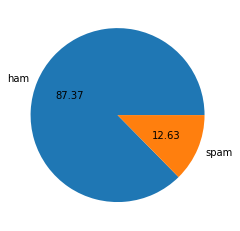

In [19]:
import matplotlib.pyplot as plt
plt.pie(sms['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f');

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
# Fetching The Number Of Characters
sms['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [23]:
sms['character_count'] = sms['text'].apply(len)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
sms

,target,text,character_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [25]:
# Fetching The Number Of Words
sms['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [26]:
sms['word_count'] = sms['text'].apply(lambda x:len(nltk.word_tokenize(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
sms.head()

,target,text,character_count,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
# Fetching The Number Of Sentences
sms['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [29]:
sms['sentences_count'] = sms['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
sms.head()

,target,text,character_count,word_count,sentences_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
sms[['character_count', 'word_count', 'sentences_count']].describe()

,character_count,word_count,sentences_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
# Statistical Description Of ham Messages
sms[sms['target'] == 0][['character_count', 'word_count', 'sentences_count']].describe()

,character_count,word_count,sentences_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
# Statistical Description Of spam Messages
sms[sms['target'] == 1][['character_count', 'word_count', 'sentences_count']].describe()

,character_count,word_count,sentences_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [34]:
import seaborn as sns

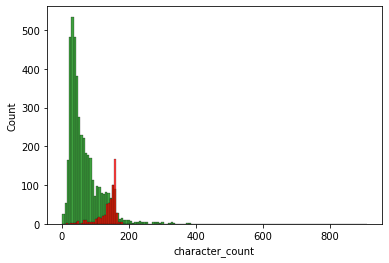

In [35]:
sns.histplot(sms[sms['target'] == 0]['character_count'], color='green');
sns.histplot(sms[sms['target'] == 1]['character_count'], color='red', );

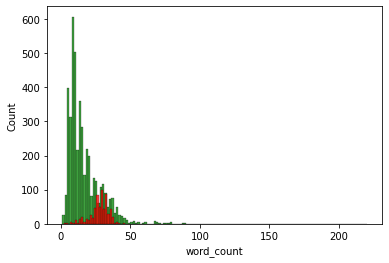

In [36]:
sns.histplot(sms[sms['target'] == 0]['word_count'], color='green');
sns.histplot(sms[sms['target'] == 1]['word_count'], color='red', );

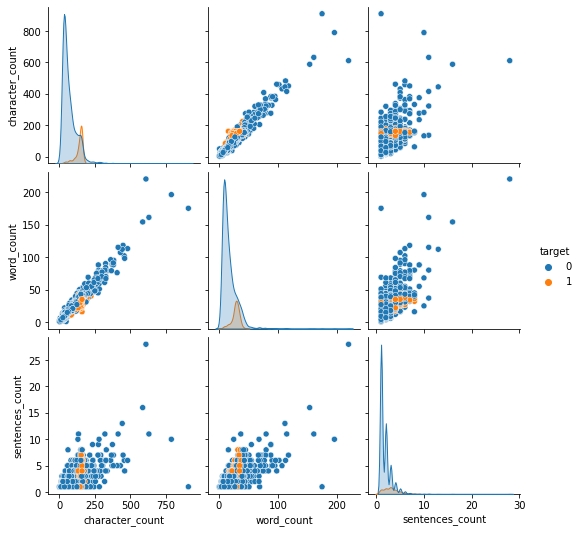

In [37]:
sns.pairplot(sms, hue='target');

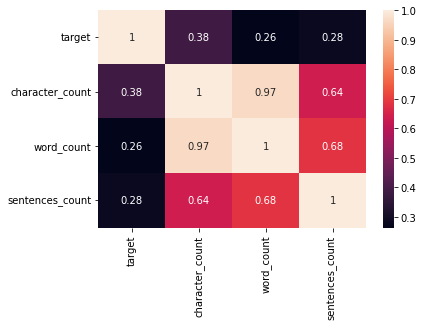

In [38]:
sns.heatmap(sms.corr(), annot=True);

In [39]:
from nltk.corpus import stopwords
nltk.download('stopwords')
#stopwords.words('english')
import string
#string.punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [40]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
     if i.isalnum():
       y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return ' '.join(y)

In [41]:
sms['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [42]:
sms['transformed_text'] = sms['text'].apply(transform_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
sms.head()

,target,text,character_count,word_count,sentences_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

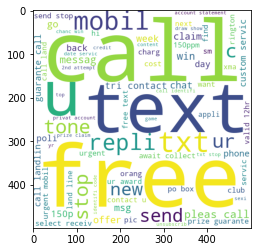

In [45]:
spam_wc = wc.generate(sms[sms['target'] == 1]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc);

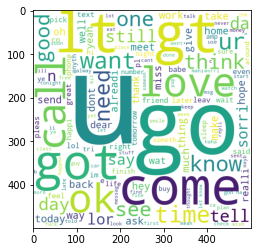

In [46]:
ham_wc = wc.generate(sms[sms['target'] == 0]['transformed_text'].str.cat(sep=' '))
plt.imshow(ham_wc);

In [50]:
#Model Building

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [52]:
X = cv.fit_transform(sms['transformed_text']).toarray()

In [53]:
y = sms['target']

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [55]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [56]:
# Training
gnb.fit(X_train, y_train)

# Prediction
y_pred_gnb = gnb.predict(X_test)

# Accuracy Score
acc_gnb = accuracy_score(y_test, y_pred_gnb)
print(f'The Accuracy Score Of GaussianNB :\n {acc_gnb}')

# Confusion MAtrix
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
print(f'The Confusion Matrix Of GaussianNB :\n {conf_matrix_gnb}')
# Precision Score
precision_gnb = precision_score(y_test, y_pred_gnb)
print(f'The Precision Score Of GaussianNB :\n {precision_gnb}')

The Accuracy Score Of GaussianNB :
 0.8800773694390716
The Confusion Matrix Of GaussianNB :
 [[792 104]
 [ 20 118]]
The Precision Score Of GaussianNB :
 0.5315315315315315


In [57]:
# Training
mnb.fit(X_train, y_train)

# Prediction
y_pred_mnb = mnb.predict(X_test)

# Accuracy Score
acc_mnb = accuracy_score(y_test, y_pred_mnb)
print(f'The Accuracy Score Of MultinomialNB :\n {acc_mnb}')

# Confusion MAtrix
conf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb)
print(f'The Confusion Matrix Of MultinomialNB :\n {conf_matrix_mnb}')
# Precision Score
precision_mnb = precision_score(y_test, y_pred_mnb)
print(f'The Precision Score Of MultinomialNB :\n {precision_mnb}')

The Accuracy Score Of MultinomialNB :
 0.9642166344294004
The Confusion Matrix Of MultinomialNB :
 [[871  25]
 [ 12 126]]
The Precision Score Of MultinomialNB :
 0.8344370860927153


In [58]:
# Training
bnb.fit(X_train, y_train)

# Prediction
y_pred_bnb = bnb.predict(X_test)

# Accuracy Score
acc_bnb = accuracy_score(y_test, y_pred_bnb)
print(f'The Accuracy Score Of BernoulliNB :\n {acc_bnb}')

# Confusion MAtrix
conf_matrix_bnb = confusion_matrix(y_test, y_pred_bnb)
print(f'The Confusion Matrix Of BernoullilNB :\n {conf_matrix_bnb}')
# Precision Score
precision_bnb = precision_score(y_test, y_pred_bnb)
print(f'The Precision Score Of BernoulliNB :\n {precision_bnb}')

The Accuracy Score Of BernoulliNB :
 0.9700193423597679
The Confusion Matrix Of BernoullilNB :
 [[893   3]
 [ 28 110]]
The Precision Score Of BernoulliNB :
 0.9734513274336283
